# PRACTICUM 2 MSDS 696 NICK MOLLICONI

## Datafiles:

1. https://www.kaggle.com/datasets/jabenitez88/eating-disorders-tweets
2. https://www.kaggle.com/datasets/valchovalev/prevalenceofeatingdisordersinmalesvsfemales



## Install & Import

In [1]:
# pip install -q statsmodels

In [2]:
# pip install --upgrade notebook

In [3]:
# pip install -q wordcloud

In [4]:
# pip install -q textblob

In [5]:
# pip install -q bioinfokit

In [6]:
# pip install geopy -q

In [7]:
# pip install -q matplotlib numpy

In [8]:
# pip install -q geopandas matplotlib

In [9]:
# pip install hvplot --upgrade

In [10]:
# pip install @pyviz/jupyterlab_pyviz

In [11]:
# pip install --upgrade hvplot geoviews bokeh

In [12]:
# pip install pyproj

In [13]:
# pip install cartopy

In [14]:
# pip install matplotlib

In [15]:
# pip install scipy

In [16]:
%matplotlib inline
from bioinfokit.analys import stat
from collections import Counter
from IPython.display import display
from geopy.geocoders import Nominatim
from matplotlib.colors import ListedColormap
from nltk import ngrams
from nltk.collocations import *
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from numpy import mean
from numpy import std
from numpy.random import rand
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr, t
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import pointbiserialr
from scipy.stats import spearmanr
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud, STOPWORDS
import geopandas
import geopandas as gpd
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import nltk
import numpy as np
import os
import pandas
import pandas as pd
import pylab
import re
import seaborn as sns
import spacy
import string
import ydata_profiling
nlp = spacy.load("en_core_web_lg")
nltk.download('punkt')
sns.set()  
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\NICKM\anaconda3\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\Nick Molliconi\AppData\Local\Temp\ipykernel_8320\530187270.py:29: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, 

In [17]:
def get_city_name(geolocation):
    geolocator = Nominatim(user_agent="geo_to_city_name") 
    location = geolocator.reverse(geolocation)  
    return location.raw.get('address', {}).get('city', 'Unknown')  
# Source: https://stackoverflow.com/questions/46809525/python-geopy-get-city-and-country

In [18]:
os.environ['USE_PYGEOS'] = '0'
# Source: https://www.atmos.albany.edu/facstaff/ktyle/atm533/core/week4/geopandas.html#:~:text=You%20can%20do%20this%20before%20starting%20the%20Python,Shapely%20by%20default%2C%20even%20if%20PyGEOS%20is%20installed.

## Read Data Files

In [19]:
EDTWEET = pd.read_csv('tweets.csv')

In [20]:
EDPREV = pd.read_csv('prevalence.csv')

# Tweet Data

### EDA & CLEANING DATA

In [21]:
column_names = EDTWEET.columns
print(column_names)

Index(['Unnamed: 0', 'id_tweet', 'date', 'author', 'text', 'app', 'id_user',
       'followers', 'following', 'statuses', 'location', 'urls', 'geolocation',
       'name', 'description', 'url_media', 'type_media', 'quoted', 'relation',
       'replied_id', 'user_replied', 'retweeted_id', 'user_retweeted',
       'quoted_id', 'user_quoted', 'first_HT', 'lang', 'created_at',
       'verified', 'avatar', 'link', 'stream_group', 'text_orig', 'hashtag',
       'Segmented#'],
      dtype='object')


In [22]:
selected_columns = ['followers', 'geolocation', 'text_orig','author','app']
EDT3 = EDTWEET[selected_columns].copy()
# Creating a new df=EDT3 and copied selected columns.

In [23]:
EDT3 = EDT3.rename(columns={'geolocation': 'geoL', 'followers': 'followers', 'text_orig': 'tweet'})
# Rename columns in EDT3

In [24]:
EDT3.columns

Index(['followers', 'geoL', 'tweet', 'author', 'app'], dtype='object')

In [25]:
column_counts_with_nan = EDT3.shape[0]
print(column_counts_with_nan)

494025


In [26]:
null_counts = EDT3.isnull().sum()
print(null_counts)

followers      0
geoL           0
tweet          0
author         0
app          245
dtype: int64


In [27]:
count_none = (EDT3['geoL'] == 'None').sum()
print(count_none)

493821


In [28]:
# More out of curiosity, the code below lists out the total tweets by author.  
# This will not be utilized in any of the analysis.

In [29]:
EDT3['Total Tweet Count'] = 1
author_sum = EDT3.groupby('author').agg({'Total Tweet Count': 'sum', 'followers': 'sum'})
top_25_authors = author_sum.sort_values(by='Total Tweet Count', ascending=False).head(25)
print(top_25_authors)

                  Total Tweet Count    followers
author                                          
@Engr0004                      1174      75135.0
@LolitaDolie                    567      16846.0
@EDmirrormirror                 458    4700040.0
@HopeVirgo                      421    5630052.0
@EarthWizardInfo                379   12829763.0
@fatburnweightlo                324       5508.0
@Bobby6740                      305    1173581.0
@2677Thomas                     272        842.0
@Errors_Edits                   260          0.0
@Shape_Magazine                 221  136204902.0
@hanhan11245                    212          0.0
@1Dgreekfansss                  193     736203.0
@selfhelpessays                 165      37586.0
@HealingMindsTW                 162     513277.0
@realinwordz_                   162    2956150.0
@hlhurst                        159     164404.0
@AgnesAyton                     157     538733.0
@galleryofdoug                  155     206751.0
@hthealthshots      

## STATISTICALLY SIGNIFIGANT SAMPLE SIZE

In [30]:
def calculate_stratified_sample_size(strata_info, confidence_level, margin_of_error):
    total_sample_size = 0    
    for stratum in strata_info:
        stratum_proportion = strata_info[stratum]['proportion']
        stratum_size = strata_info[stratum]['size']        
        z = stats.norm.ppf(1 - (1 - confidence_level) / 2)
        n_stratum = (z**2 * stratum_proportion * (1 - stratum_proportion)) / margin_of_error**2
        sample_size_stratum = n_stratum * (stratum_size / sum(strata_info[s]['size'] for s in strata_info))
        total_sample_size += sample_size_stratum
    return total_sample_size
strata_info = {
    'Stratum1': {'proportion': 0.2, 'size': 100000},
    'Stratum2': {'proportion': 0.3, 'size': 150000},
    'Stratum3': {'proportion': 0.5, 'size': 243000},
}

confidence_level = 0.95  # 95% confidence level
margin_of_error = 0.05  # 5% margin of error

sample_size = calculate_stratified_sample_size(strata_info, confidence_level, margin_of_error)
print(f"Required sample size for stratified sampling: {sample_size:.0f}")

Required sample size for stratified sampling: 337


## RANDOM SAMPLING

In [31]:
# The signifigant sample size (see above) is 337.  Moving forward with a larger random sample
# of 1% in a new df=EDT10 (See below).

In [32]:
sample_percentage = 1
EDT10 = EDT3.sample(frac=sample_percentage / 100)
EDT10.reset_index(drop=True, inplace=True)

In [33]:
selected_columns = ['tweet','followers','app']
EDT11 = EDT10[selected_columns].copy()
# Selecting only the 'tweet' column to apply to the clense below:

In [34]:
def remove_stopwords_and_punctuation(text):
    stop_words = set(nltk.corpus.stopwords.words('english'))
    stop_words.update(['amp', 'rt','nt','hi','na','wo'])
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    words = [re.sub(f"[{string.punctuation}]", "", word) for word in words]
    return ' '.join(words)
EDT11['tweet'] = EDT11['tweet'].apply(remove_stopwords_and_punctuation)
EDT11['tweet'] = EDT11['tweet'].str.lower()
# Removal of Stopwords and Punctuation.  Convert upper case words to lower case words:
# Source: https://stackoverflow.com/questions/19560498/faster-way-to-remove-stop-words-in-python

In [35]:
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)
    return cleaned_text
EDT11['tweet'] = EDT11['tweet'].apply(clean_text)
# Source: https://stackoverflow.com/questions/71878621/python-re-suba-za-z-string-for-a-list

In [36]:
def filter_non_recognized_words(text):
    doc = nlp(text)
    recognized_words = [token.text for token in doc if not token.is_oov and len(token.text) > 1]
    return " ".join(recognized_words)
EDT11['tweet'] = EDT11['tweet'].apply(filter_non_recognized_words)
# Removal of non recognized words:
# Source: https://stackoverflow.com/questions/55443298/remove-meaningless-words-from-dataframe-column

In [37]:
EDT11['tweet'] = EDT11['tweet'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))


In [38]:
selected_columns = ['tweet', 'followers','app']
EDT12 = EDT11[selected_columns].copy()
# Creating a new df=EDT12 as a precaution before sentiment analysis.

In [39]:
lemmatizer = WordNetLemmatizer()
EDT12['lemmatized_text'] = EDT12['tweet'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
# Lemmatizing words for sentimenta analysis.

## SENTIMENT ANALYSIS

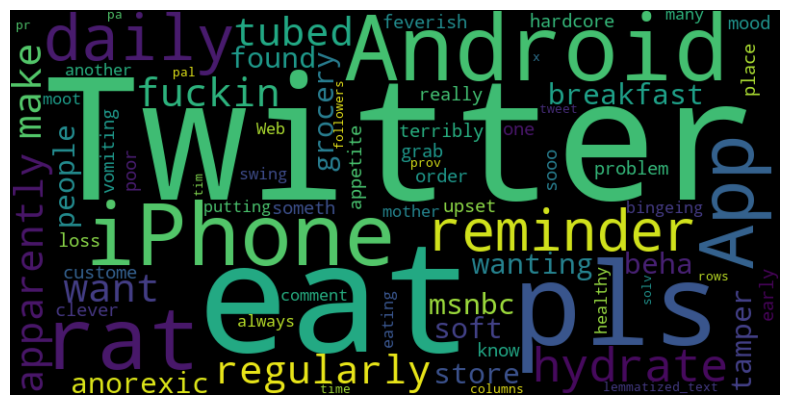

In [40]:
text = str(EDT12)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Source: https://www.geeksforgeeks.org/text-preprocessing-in-python-set-1/
# Source: https://www.youtube.com/watch?v=NaeyhIBIJZE
# Source: https://www.datacamp.com/tutorial/wordcloud-python
# Creating wordcloud below on the cleaned text as a visualization for my presentation.
# This will not have a major impact/reflection on the further analysis.

In [41]:
from collections import Counter
top_words_count = Counter(" ".join(EDT12['tweet']).split()).most_common(10)
top_words = [word_count[0] for word_count in top_words_count]
for idx, word in enumerate(top_words, start=1):
    print(f"{idx}. {word}")    
# Create a top 15 list of words tweeted by volume

1. eating
2. food
3. healthy
4. problem
5. like
6. people
7. eat
8. disorders
9. issue
10. amp


## Vader Sentiment Analysis:

In [42]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
def get_sentiment(tweet):
    sentiment_scores = sid.polarity_scores(tweet)
    if sentiment_scores['compound'] >= 0.05:
        return 'Positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'
EDT12['Tweet_Sentiment'] = EDT12['tweet'].apply(get_sentiment)
sentiment_counts = EDT12['Tweet_Sentiment'].value_counts()
observed = [sentiment_counts['Positive'], sentiment_counts['Negative'], sentiment_counts['Neutral']]
chi2, p, dof, expected = chi2_contingency([observed])
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Source: https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
# Decided on utilizing the Vader Sentiment Analysis as a way to show the "feeling/sentiment"
# of the sampled tweets.  This will be a major part of my further correlation analysis.


[nltk_data] Downloading package vader_lexicon to C:\Users\Nick
[nltk_data]     Molliconi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Chi-square value: 0.0
P-value: 1.0


## Barplot on Vader Sentiment Analysis

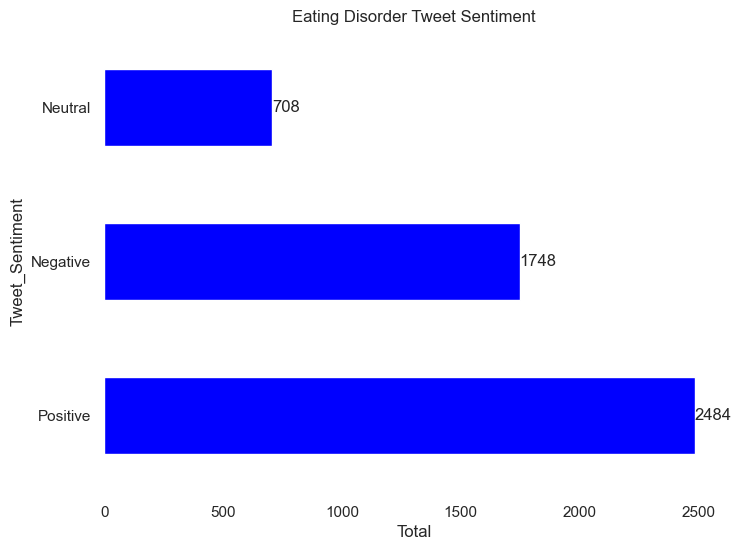

In [43]:
sentiment_counts = EDT12['Tweet_Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
colors = ['blue'] * len(sentiment_counts)
sentiment_counts.plot(kind='barh', color=colors)
plt.title('Eating Disorder Tweet Sentiment')
plt.xlabel('Total')
plt.ylabel('Tweet_Sentiment')
plt.gca().set_facecolor('none')
for i, count in enumerate(sentiment_counts):
    plt.text(count, i, str(count), ha='left', va='center')
plt.show()
# Plotting the Vader Sentiment.  My initial thoughts, prior to the results below, was that
# there would be more negative tweets around eating disorders, but this proves otherwise.

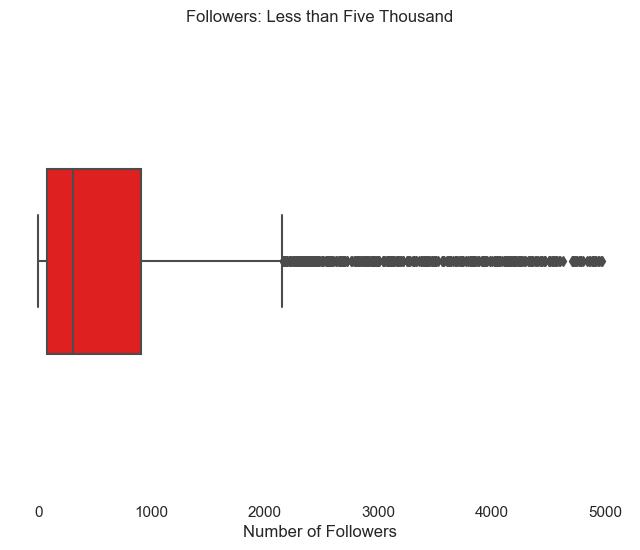

In [44]:
filtered_followers = EDT12[EDT12['followers'] < 5000]['followers']
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_followers, color='red', width=0.4, orient='h')  # Set orient='h' for horizontal
plt.title('Followers: Less than Five Thousand')
plt.xlabel('Number of Followers')  # Change ylabel to xlabel for horizontal orientation
plt.gca().set_facecolor('white')
plt.show()
# Source: https://github.com/mGalarnyk/Python_Tutorials/blob/master/Statistics/boxplot/Box_plot_interpretation.ipynb

In [45]:
app_counts = EDT12['app'].value_counts()
print(app_counts)

Twitter for iPhone     2243
Twitter for Android    1216
Twitter Web App        1024
Twitter for iPad        102
Hootsuite Inc.           46
                       ... 
Autobot1221               1
SocialPilot.co            1
ContentCal Studio         1
Socialbakers              1
Story Chief               1
Name: app, Length: 99, dtype: int64


In [46]:
EDT12.columns

Index(['tweet', 'followers', 'app', 'lemmatized_text', 'Tweet_Sentiment'], dtype='object')

In [47]:
EDT12ab = EDT12.copy()

In [48]:
EDT12ab.columns

Index(['tweet', 'followers', 'app', 'lemmatized_text', 'Tweet_Sentiment'], dtype='object')

In [49]:
EDT12a1 = EDT12ab.loc[EDT12ab['app'].isin(['Twitter for iPhone', 'Twitter for Android'])]


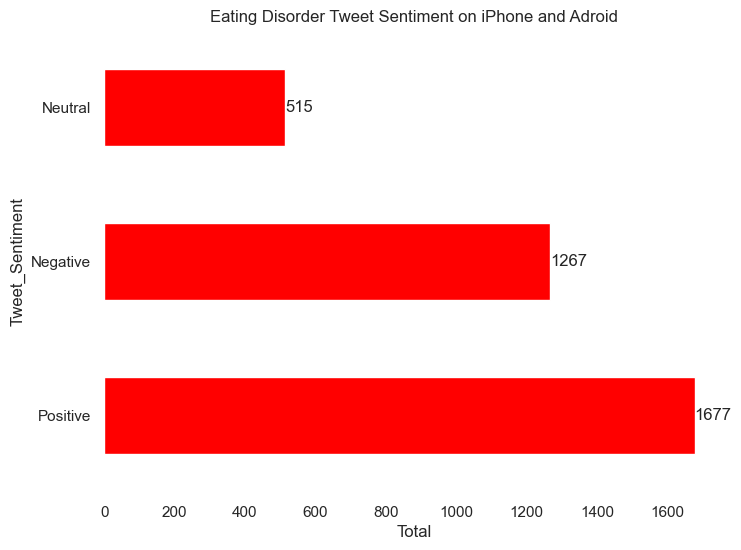

In [50]:
sentiment_counts1 = EDT12a1['Tweet_Sentiment'].value_counts()
plt.figure(figsize=(8, 6))
colors = ['red'] * len(sentiment_counts1)
sentiment_counts1.plot(kind='barh', color=colors)
plt.title('Eating Disorder Tweet Sentiment on iPhone and Adroid')
plt.xlabel('Total')
plt.ylabel('Tweet_Sentiment')
plt.gca().set_facecolor('none')
for i, count in enumerate(sentiment_counts1):
    plt.text(count, i, str(count), ha='left', va='center')
plt.show()

# Prevelance Data

## EDA and Understanding Data

In [51]:
column_names = EDPREV.columns
print(column_names)

Index(['Entity', 'Code', 'Year',
       'Prevalence - Eating disorders - Sex: Male - Age: Age-standardized (Percent)',
       'Prevalence - Eating disorders - Sex: Female - Age: Age-standardized (Percent)',
       'Total population (Gapminder)', 'Continent'],
      dtype='object')


In [52]:
EDPREV.rename(columns={
    'Prevalence - Eating disorders - Sex: Male - Age: Age-standardized (Percent)': 'Male Prev %',
    'Prevalence - Eating disorders - Sex: Female - Age: Age-standardized (Percent)': 'Female Prev %',
    'Total population (Gapminder)': 'Pop.',
    'Entity': 'Country'
}, inplace=True)

# Renaming the columns so they are easier to work with.

In [53]:
EDPREV['Male Prev Pop'] = None
EDPREV['Female Prev Pop'] = None
EDPREV['Total Prev Pop'] = None

In [54]:
EDPREV.columns

Index(['Country', 'Code', 'Year', 'Male Prev %', 'Female Prev %', 'Pop.',
       'Continent', 'Male Prev Pop', 'Female Prev Pop', 'Total Prev Pop'],
      dtype='object')

In [55]:
EDPREV.info
# initial look at EDPREV

<bound method DataFrame.info of              Country      Code  Year  Male Prev %  Female Prev %        Pop.  \
0           Abkhazia  OWID_ABK  2015          NaN            NaN         NaN   
1        Afghanistan       AFG  1990     0.060603       0.140030  13032161.0   
2        Afghanistan       AFG  1991     0.059345       0.136398  14069854.0   
3        Afghanistan       AFG  1992     0.057992       0.133102  15472076.0   
4        Afghanistan       AFG  1993     0.057009       0.129934  17053213.0   
...              ...       ...   ...          ...            ...         ...   
22074       Zimbabwe       ZWE  1986          NaN            NaN   9189169.0   
22075       Zimbabwe       ZWE  1987          NaN            NaN   9523376.0   
22076       Zimbabwe       ZWE  1988          NaN            NaN   9852244.0   
22077       Zimbabwe       ZWE  1989          NaN            NaN  10169188.0   
22078  Åland Islands       ALA  2015          NaN            NaN         NaN   

      C

In [56]:
EDPREV.describe()
# Another look at EDPREV

,Year,Male Prev %,Female Prev %,Pop.
count,22079.000000,6468.000000,6468.000000,2.008100e+04
mean,1959.626296,0.140061,0.340059,2.077203e+07
std,51.174762,0.078302,0.240546,8.400212e+07
min,1700.000000,0.048386,0.098501,0.000000e+00
25%,1944.000000,0.080198,0.163057,5.110000e+05
50%,1973.000000,0.115485,0.249623,3.518000e+06
75%,1996.000000,0.170513,0.426744,1.125366e+07
max,2017.000000,0.500560,1.380172,1.359368e+09


In [57]:
EDPREV.isnull().sum()
# Checking for nulls

Country                0
Code                 980
Year                   0
Male Prev %        15611
Female Prev %      15611
Pop.                1998
Continent          21794
Male Prev Pop      22079
Female Prev Pop    22079
Total Prev Pop     22079
dtype: int64

In [58]:
column_counts_with_nan = EDPREV.shape[0]
print(column_counts_with_nan)

22079


In [59]:
unique_years = EDPREV['Year'].unique()
print(unique_years)

# Looking at the dataset to understand what years are represented.  As you can see below
# there is quite a rich dataset of historical data.

[2015 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002
 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2016 2017
 1800 1820 1870 1913 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959
 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1700 1850 1890 1900 1910 1920 1921 1922 1923 1924 1925 1926
 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940
 1941 1942 1943 1944 1945 1946 1947 1948 1949 1912 1851 1861 1871 1881
 1891 1901 1911 1902 1903 1904 1905 1906 1907 1908 1909 1914 1915 1916
 1917 1918 1919 1821 1822 1823 1824 1825 1826 1827 1828 1829 1830 1831
 1832 1833 1834 1835 1836 1837 1838 1839 1840 1841 1842 1843 1844 1845
 1846 1847 1848 1849 1852 1853 1854 1855 1856 1857 1858 1859 1860 1862
 1863 1864 1865 1866 1867 1868 1869 1872 1873 1874 1875 1876 1877 1878
 1879 1880 1882 1883 1884 1885 1886 1887 1888 1889 1892 1893 1894 1895
 1896 

In [60]:
EDP1 = EDPREV.copy()
EDP1 = EDP1[(EDP1['Year'] >= 2009) & (EDP1['Year'] <= 2013)]
EDP1.reset_index(drop=True, inplace=True)
# Decided to filter and use years 2009 thru 2013 and create a new df=EDP1.

In [61]:
unique_years = EDP1['Year'].unique()
print(unique_years)

[2009 2010 2011 2012 2013]


In [62]:
column_counts_with_nan = EDP1.shape[0]
print(column_counts_with_nan)

1308


In [63]:
EDP1['Male Prev Pop'] = (EDP1['Male Prev %'] * EDP1['Pop.']) / 10
EDP1['Female Prev Pop'] = (EDP1['Female Prev %'] * EDP1['Pop.']) / 10
# Add Prev Pop columns and formula: Prev % * Pop for Male and Female

In [64]:
EDP1['Total Prev Pop'] = EDP1['Male Prev Pop'] + EDP1['Female Prev Pop']
# Add new column Total Prev Pop and formulat: Male + Female Prev Pop columns

In [65]:
EDP1.head(5)
# Checking new columns and calculations.

,Country,Code,Year,Male Prev %,Female Prev %,Pop.,Continent,Male Prev Pop,Female Prev Pop,Total Prev Pop
0,Afghanistan,AFG,2009,0.058459,0.132627,30577756.0,NaN,178753.842004,405543.672365,584297.514370
1,Afghanistan,AFG,2010,0.059896,0.135615,31411743.0,NaN,188145.101328,425991.382635,614136.483963
2,Afghanistan,AFG,2011,0.060794,0.137496,32358260.0,NaN,196719.461333,444912.746435,641632.207769
3,Afghanistan,AFG,2012,0.061412,0.139546,33397058.0,NaN,205097.868095,466042.727387,671140.595483
4,Afghanistan,AFG,2013,0.062308,0.141589,34499915.0,NaN,214960.786824,488480.661477,703441.448301


In [66]:
def categorize_color(x):
    if x <= 20000000:
        return 'blue'
    else:
        return 'red'
EDP1['Red'] = EDP1['Total Prev Pop'].apply(categorize_color)
# Creating a new column to be utlized for the upcoming geospatial visualization.

In [67]:
EDP1.head(5)
# Checking to see if new Red column is working properly.

,Country,Code,Year,Male Prev %,Female Prev %,Pop.,Continent,Male Prev Pop,Female Prev Pop,Total Prev Pop,Red
0,Afghanistan,AFG,2009,0.058459,0.132627,30577756.0,NaN,178753.842004,405543.672365,584297.514370,blue
1,Afghanistan,AFG,2010,0.059896,0.135615,31411743.0,NaN,188145.101328,425991.382635,614136.483963,blue
2,Afghanistan,AFG,2011,0.060794,0.137496,32358260.0,NaN,196719.461333,444912.746435,641632.207769,blue
3,Afghanistan,AFG,2012,0.061412,0.139546,33397058.0,NaN,205097.868095,466042.727387,671140.595483,blue
4,Afghanistan,AFG,2013,0.062308,0.141589,34499915.0,NaN,214960.786824,488480.661477,703441.448301,blue


In [68]:
EDP1["Country"] = EDP1["Country"].replace("United States", "United States of America")
# Renaming data point to match the name that is used in the geospatial code below.

In [69]:
EDP2 = EDP1[EDP1['Year'] == 2013].copy()
EDP2 = EDP2[['Total Prev Pop', 'Year', 'Country']]
EDP2['Total Prev Pop'] = EDP2['Total Prev Pop'].apply('{:,.0f}'.format)
print(EDP2)

# Filtering on only 2013

     Total Prev Pop  Year                     Country
4           703,441  2013                 Afghanistan
9           108,279  2013                     Albania
14        1,542,800  2013                     Algeria
19            2,585  2013              American Samoa
24              nan  2013        Andean Latin America
...             ...   ...                         ...
1287            nan  2013  Western Sub-Saharan Africa
1292            nan  2013                       World
1297            nan  2013                       Yemen
1302        384,220  2013                      Zambia
1307        307,414  2013                    Zimbabwe

[261 rows x 3 columns]


In [70]:
print(EDP2.dtypes)

Total Prev Pop    object
Year               int64
Country           object
dtype: object


## Geospatial visualization: 2013 Total Prev. Population

C:\Users\Nick Molliconi\AppData\Local\Temp\ipykernel_8320\1329661133.py:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles, labels = ax.get_legend().legendHandles, [legend_labels.get(label.get_text(), label.get_text()) for label in ax.get_legend().get_texts()]


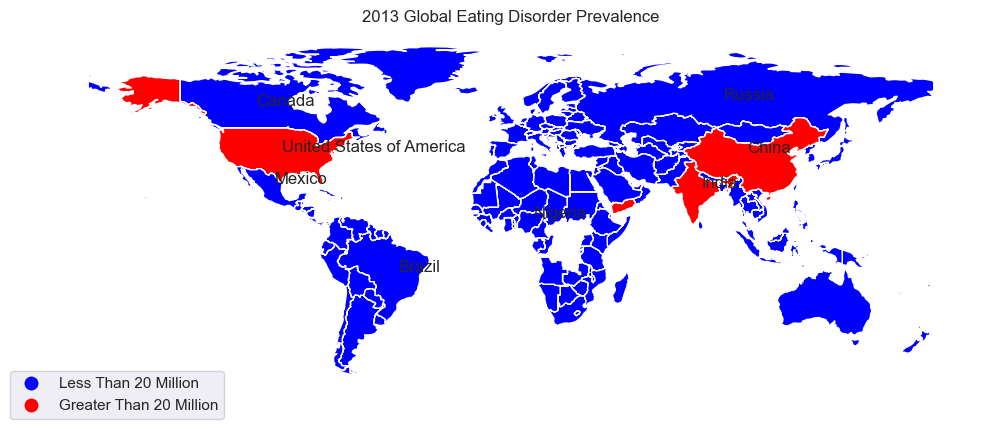

In [71]:
def categorize_color(x):
    if x is not None and x <= 20000000:
        return 'blue'
    else:
        return 'red'
EDP2['Red'] = EDP1['Total Prev Pop'].apply(categorize_color)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(EDP1, left_on='name', right_on='Country', how='left')
colors = ['blue', 'red']
cmap = ListedColormap(colors)
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.plot(column='Red', ax=ax, legend=True, legend_kwds={'title': 'Prevalence Population'}, cmap=cmap)


legend_labels = {
    'blue': 'Less Than 20 Million',
    'red': 'Greater Than 20 Million',
}

ax.set_title('2013 Global Eating Disorder Prevalence')
ax.set_axis_off()
handles, labels = ax.get_legend().legendHandles, [legend_labels.get(label.get_text(), label.get_text()) for label in ax.get_legend().get_texts()]
ax.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.2, -0.1))
countries_to_label = ["United States of America", "Brazil", "Canada", "Mexico", "Russia", "China", "India", "Nigeria"]
for country in countries_to_label:
    geometry = world[world['name'] == country]['geometry'].values[0]
    x, y = geometry.representative_point().x, geometry.representative_point().y
    ax.annotate(country, xy=(x, y), xytext=(3, 3), textcoords='offset points')
plt.show()

# Split the color red/blue based on total prevalence population of <> 20 Million in 2013.

In [72]:
countries_to_include = ["United States of America", "Brazil", "Canada", "Mexico", "Russia", "China", "Nigeria", "India"]
GEO2 = EDP1[EDP1['Country'].isin(countries_to_include)].copy()
GEO2.reset_index(drop=True, inplace=True)
# Creating a new df called GEO2 to represent only 8 nations with high 
# prevalence population.  This will be used in future correlation analysis.

## Plot total prevalence population (2009-2013) for GEO2

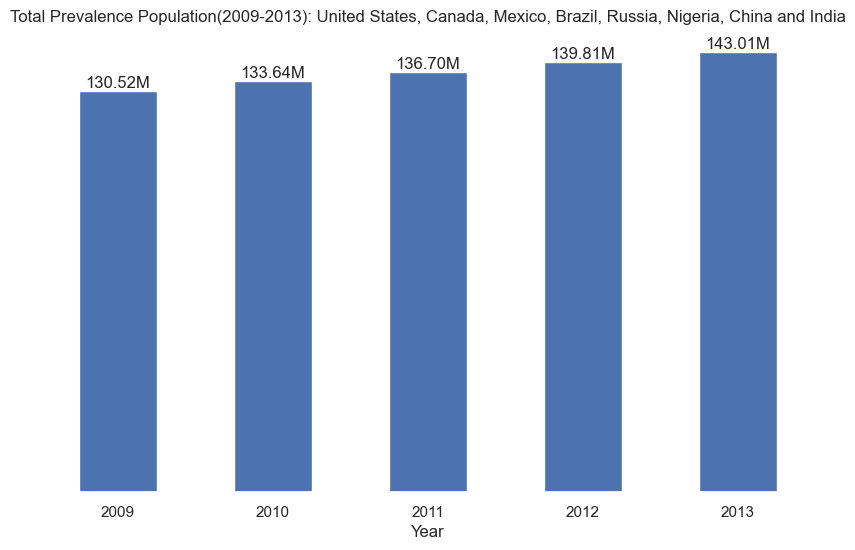

In [73]:
years_to_plot = [2009, 2010, 2011, 2012, 2013]
filtered_df = GEO2[(GEO2['Year'].isin(years_to_plot)) & (GEO2['Country'].isin(countries_to_include))]
grouped_df = filtered_df.groupby('Year')['Total Prev Pop'].sum()
plt.figure(figsize=(10, 6))
bars = grouped_df.plot(kind='bar')
plt.title('Total Prevalence Population(2009-2013): United States, Canada, Mexico, Brazil, Russia, Nigeria, China and India')
plt.xlabel('Year')
plt.xticks(rotation=0)
for i, v in enumerate(grouped_df):
    plt.text(i, v, f'{v / 1e6:.2f}M', ha='center', va='bottom')
plt.gca().get_yaxis().set_visible(False)
plt.gca().set_facecolor('none')
plt.savefig('transparent_plot.png', transparent=True)
plt.show()

In [74]:
countries_to_include = ["United States of America", "Brazil", "Canada", "Mexico"]
GEO3 = EDP1[EDP1['Country'].isin(countries_to_include)].copy()
GEO3.reset_index(drop=True, inplace=True)
# Creating a new df called GEO3 to represent only Western Hemisphere nations with high 
# prevalence population.  This will be used in future correlation analysis.

## Plot total prevalence population (2009-2013) for GEO3

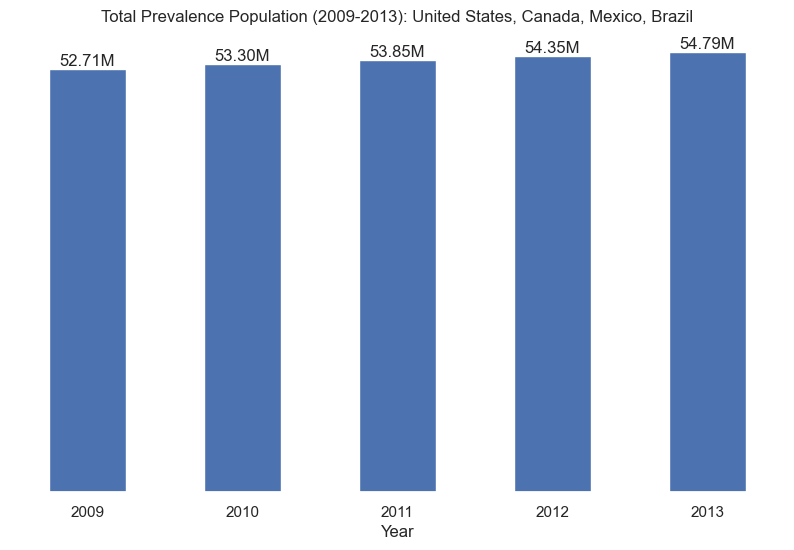

In [75]:
years_to_plot = [2009, 2010, 2011, 2012, 2013]
filtered_df = GEO3[(GEO3['Year'].isin(years_to_plot)) & (GEO3['Country'].isin(countries_to_include))]
grouped_df = filtered_df.groupby('Year')['Total Prev Pop'].sum()
plt.figure(figsize=(10, 6))
bars = grouped_df.plot(kind='bar')
plt.title('Total Prevalence Population (2009-2013): United States, Canada, Mexico, Brazil')
plt.xlabel('Year')
plt.xticks(rotation=0)
for i, v in enumerate(grouped_df):
    plt.text(i, v, f'{v / 1e6:.2f}M', ha='center', va='bottom')
plt.gca().get_yaxis().set_visible(False)
plt.gca().set_facecolor('none')
plt.show()

In [76]:
countries_to_include = ["Russia", "Nigeria", "China","India"]
GEO4 = EDP1[EDP1['Country'].isin(countries_to_include)].copy()
GEO4.reset_index(drop=True, inplace=True)

# Creating a new df called GEO4 to represent only Eastern Hemisphere nations with high 
# prevalence population.  This will be used in future correlation analysis.

## Plot total prevalence population (2009-2013) for GEO4

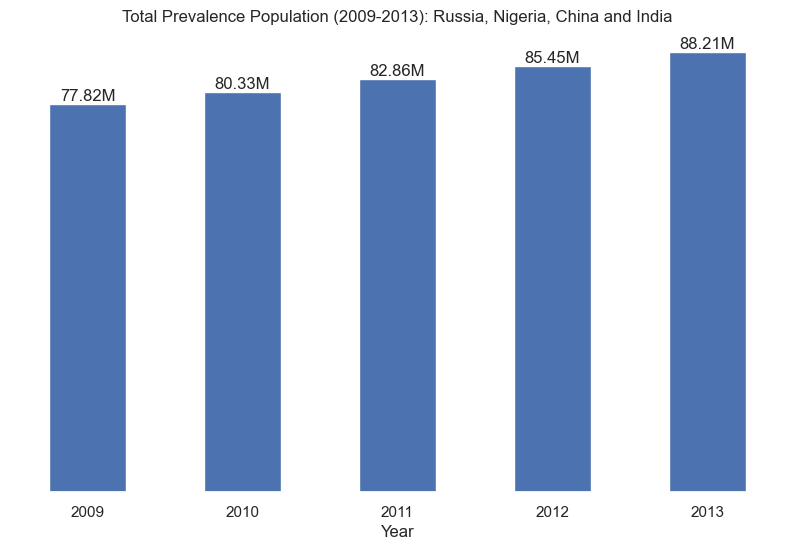

In [77]:
years_to_plot = [2009, 2010, 2011, 2012, 2013]
filtered_df = GEO4[(GEO4['Year'].isin(years_to_plot)) & (GEO4['Country'].isin(countries_to_include))]
grouped_df = filtered_df.groupby('Year')['Total Prev Pop'].sum()
plt.figure(figsize=(10, 6))
bars = grouped_df.plot(kind='bar')
plt.title('Total Prevalence Population (2009-2013): Russia, Nigeria, China and India')
plt.xlabel('Year')
plt.xticks(rotation=0)
for i, v in enumerate(grouped_df):
    plt.text(i, v, f'{v / 1e6:.2f}M', ha='center', va='bottom')
plt.gca().get_yaxis().set_visible(False)
plt.gca().set_facecolor('none')
plt.show()

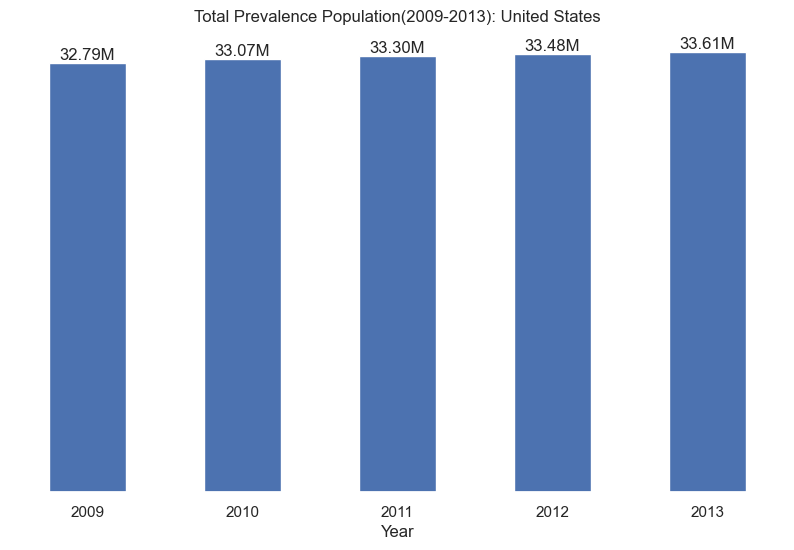

In [78]:
# UNITED STATES PREVALENCE POPULATION
years_to_plot = [2009, 2010, 2011, 2012, 2013]
filtered_df = GEO2[(GEO2['Year'].isin(years_to_plot)) & (GEO2['Country'] == 'United States of America')]
grouped_df = filtered_df.groupby('Year')['Total Prev Pop'].sum()
plt.figure(figsize=(10, 6))
bars = grouped_df.plot(kind='bar')
plt.title('Total Prevalence Population(2009-2013): United States')
plt.xlabel('Year')
plt.xticks(rotation=0)
for i, v in enumerate(grouped_df):
    plt.text(i, v, f'{v / 1e6:.2f}M', ha='center', va='bottom')
plt.gca().get_yaxis().set_visible(False)
plt.gca().set_facecolor('none')
plt.show()

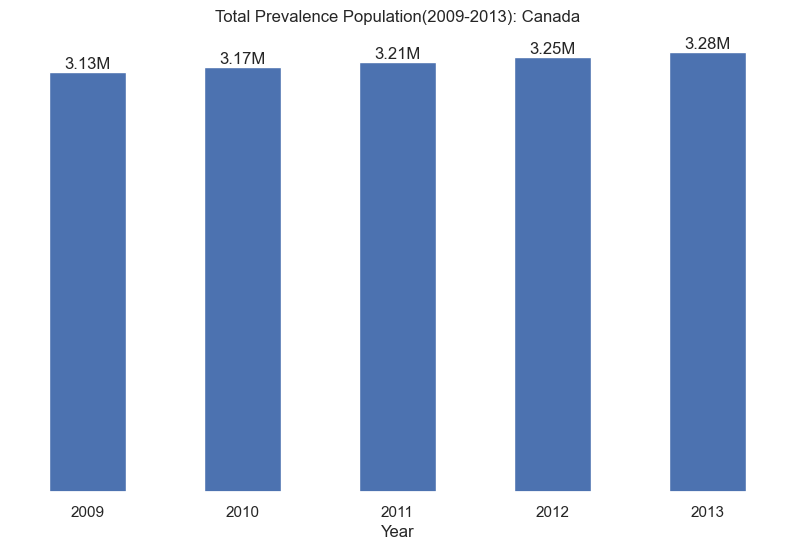

In [79]:
# CANADA PREVALENCE POPULATION
years_to_plot = [2009, 2010, 2011, 2012, 2013]
filtered_df = GEO2[(GEO2['Year'].isin(years_to_plot)) & (GEO2['Country'] == 'Canada')]
grouped_df = filtered_df.groupby('Year')['Total Prev Pop'].sum()
plt.figure(figsize=(10, 6))
bars = grouped_df.plot(kind='bar')
plt.title('Total Prevalence Population(2009-2013): Canada')
plt.xlabel('Year')
plt.xticks(rotation=0)
for i, v in enumerate(grouped_df):
    plt.text(i, v, f'{v / 1e6:.2f}M', ha='center', va='bottom')
plt.gca().get_yaxis().set_visible(False)
plt.gca().set_facecolor('none')
plt.show()

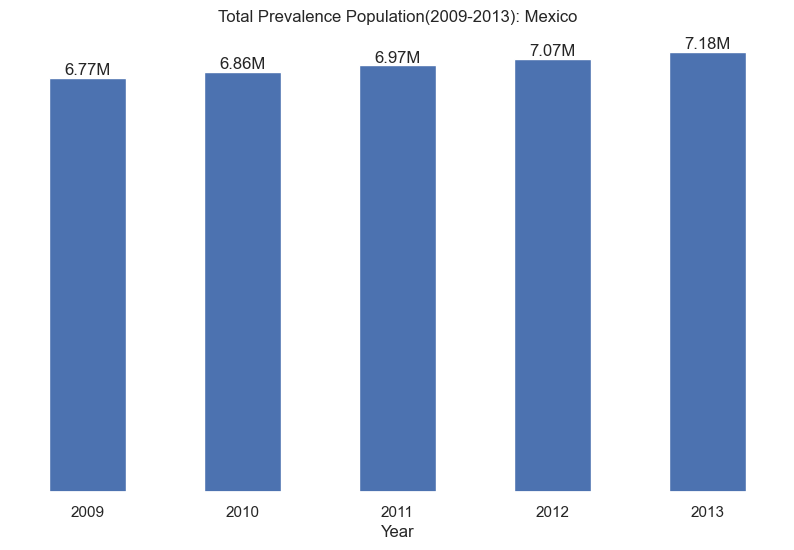

In [80]:
# MEXICO PREVALENCE POPULATION
years_to_plot = [2009, 2010, 2011, 2012, 2013]
filtered_df = GEO2[(GEO2['Year'].isin(years_to_plot)) & (GEO2['Country'] == 'Mexico')]
grouped_df = filtered_df.groupby('Year')['Total Prev Pop'].sum()
plt.figure(figsize=(10, 6))
bars = grouped_df.plot(kind='bar')
plt.title('Total Prevalence Population(2009-2013): Mexico')
plt.xlabel('Year')
plt.xticks(rotation=0)
for i, v in enumerate(grouped_df):
    plt.text(i, v, f'{v / 1e6:.2f}M', ha='center', va='bottom')
plt.gca().get_yaxis().set_visible(False)
plt.gca().set_facecolor('none')
plt.show()

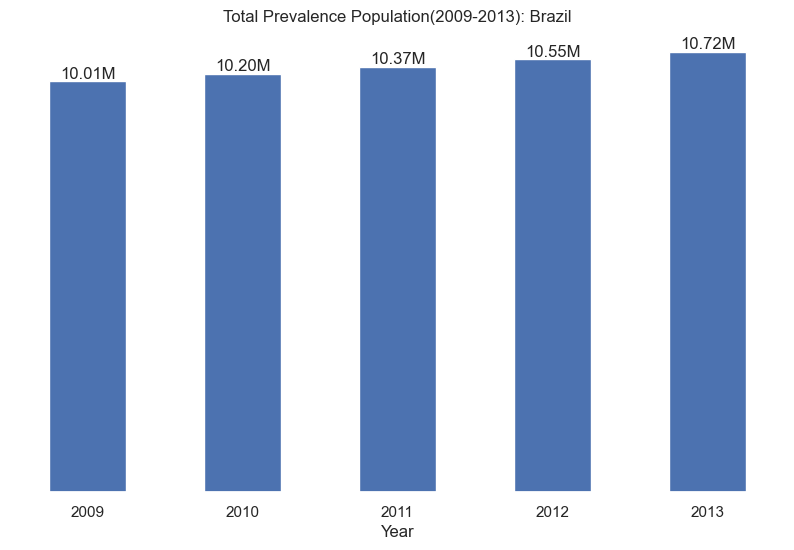

In [81]:
# BRAZIL PREVALENCE POPULATION
years_to_plot = [2009, 2010, 2011, 2012, 2013]
filtered_df = GEO2[(GEO2['Year'].isin(years_to_plot)) & (GEO2['Country'] == 'Brazil')]
grouped_df = filtered_df.groupby('Year')['Total Prev Pop'].sum()
plt.figure(figsize=(10, 6))
bars = grouped_df.plot(kind='bar')
plt.title('Total Prevalence Population(2009-2013): Brazil')
plt.xlabel('Year')
plt.xticks(rotation=0)
for i, v in enumerate(grouped_df):
    plt.text(i, v, f'{v / 1e6:.2f}M', ha='center', va='bottom')
plt.gca().get_yaxis().set_visible(False)
plt.gca().set_facecolor('none')
plt.show()

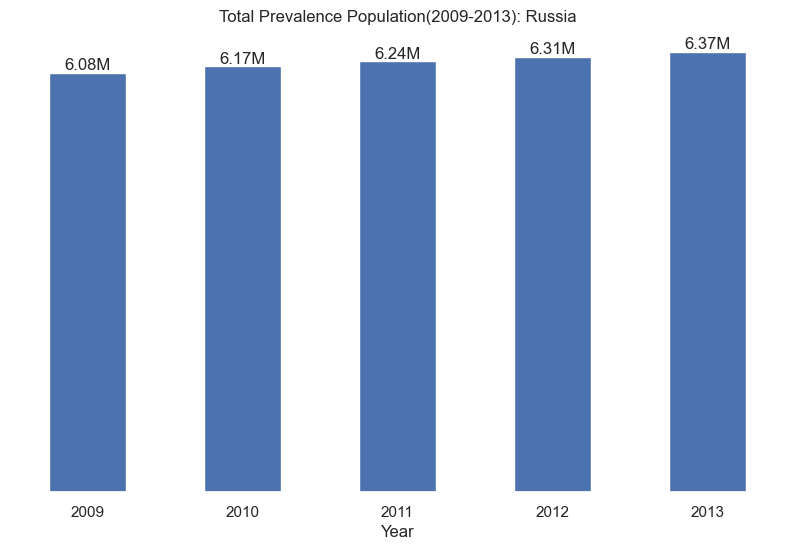

In [82]:
# RUSSIA PREVALENCE POPULATION
years_to_plot = [2009, 2010, 2011, 2012, 2013]
filtered_df = GEO2[(GEO2['Year'].isin(years_to_plot)) & (GEO2['Country'] == 'Russia')]
grouped_df = filtered_df.groupby('Year')['Total Prev Pop'].sum()
plt.figure(figsize=(10, 6))
bars = grouped_df.plot(kind='bar')
plt.title('Total Prevalence Population(2009-2013): Russia')
plt.xlabel('Year')
plt.xticks(rotation=0)
for i, v in enumerate(grouped_df):
    plt.text(i, v, f'{v / 1e6:.2f}M', ha='center', va='bottom')
plt.gca().get_yaxis().set_visible(False)
plt.gca().set_facecolor('none')
plt.show()

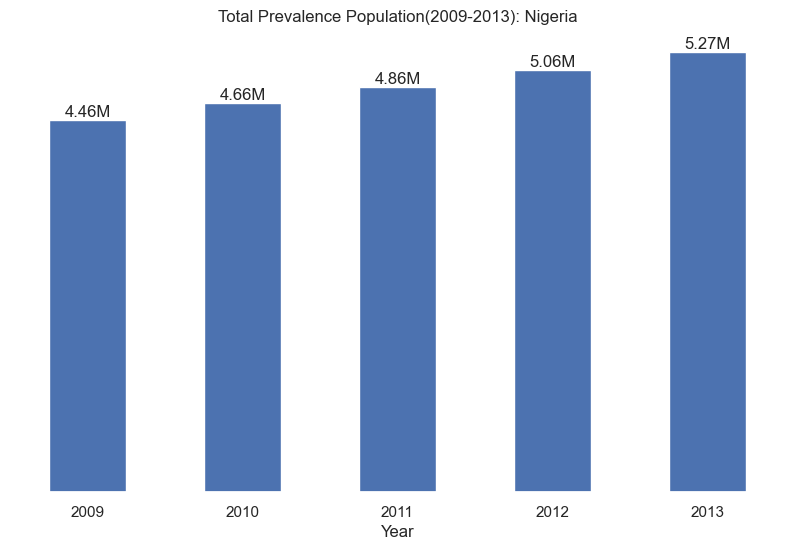

In [83]:
# NIGERIA PREVALENCE POPULATION
years_to_plot = [2009, 2010, 2011, 2012, 2013]
filtered_df = GEO2[(GEO2['Year'].isin(years_to_plot)) & (GEO2['Country'] == 'Nigeria')]
grouped_df = filtered_df.groupby('Year')['Total Prev Pop'].sum()
plt.figure(figsize=(10, 6))
bars = grouped_df.plot(kind='bar')
plt.title('Total Prevalence Population(2009-2013): Nigeria')
plt.xlabel('Year')
plt.xticks(rotation=0)
for i, v in enumerate(grouped_df):
    plt.text(i, v, f'{v / 1e6:.2f}M', ha='center', va='bottom')
plt.gca().get_yaxis().set_visible(False)
plt.gca().set_facecolor('none')
plt.show()

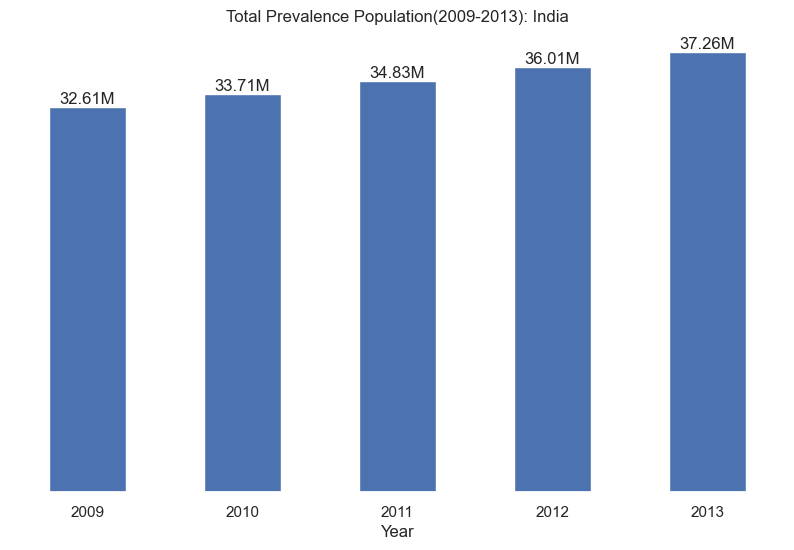

In [84]:
# INDIA PREVALENCE POPULATION
years_to_plot = [2009, 2010, 2011, 2012, 2013]
filtered_df = GEO2[(GEO2['Year'].isin(years_to_plot)) & (GEO2['Country'] == 'India')]
grouped_df = filtered_df.groupby('Year')['Total Prev Pop'].sum()
plt.figure(figsize=(10, 6))
bars = grouped_df.plot(kind='bar')
plt.title('Total Prevalence Population(2009-2013): India')
plt.xlabel('Year')
plt.xticks(rotation=0)
for i, v in enumerate(grouped_df):
    plt.text(i, v, f'{v / 1e6:.2f}M', ha='center', va='bottom')
plt.gca().get_yaxis().set_visible(False)
plt.gca().set_facecolor('none')
plt.show()

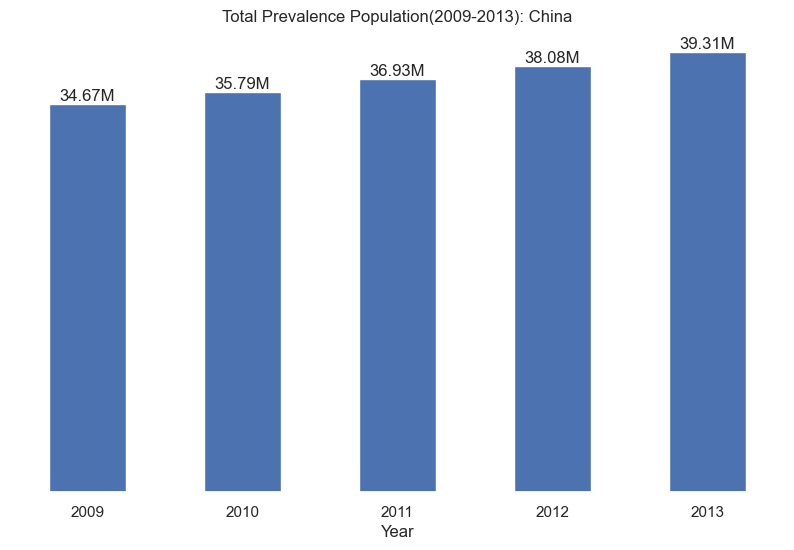

In [85]:
# CHINA PREVALENCE POPULATION
years_to_plot = [2009, 2010, 2011, 2012, 2013]
filtered_df = GEO2[(GEO2['Year'].isin(years_to_plot)) & (GEO2['Country'] == 'China')]
grouped_df = filtered_df.groupby('Year')['Total Prev Pop'].sum()
plt.figure(figsize=(10, 6))
bars = grouped_df.plot(kind='bar')
plt.title('Total Prevalence Population(2009-2013): China')
plt.xlabel('Year')
plt.xticks(rotation=0)
for i, v in enumerate(grouped_df):
    plt.text(i, v, f'{v / 1e6:.2f}M', ha='center', va='bottom')
plt.gca().get_yaxis().set_visible(False)
plt.gca().set_facecolor('none')
plt.show()

# CORRELATION

In [86]:
EDT15 = pd.DataFrame({
    'Tweet_Sentiment': EDT12['Tweet_Sentiment'],
    'geoL': EDT3['geoL'],
    'followers':EDT3['followers']
})

# Creating a new df EDT15 with only the column needed.

In [87]:
def categorize_followers(followers):
    if followers < 5000:
        return '< 5 Thousand'
    else:
        return '>= 5 Thousand'
EDT15['FG'] = EDT15['followers'].apply(categorize_followers)
print(EDT15)

# Creating a new column called FG and based off of the column followers, identifying tweets from
# authors with <> 5 Thousand followers.

       Tweet_Sentiment  geoL  followers             FG
0             Positive  None      231.0   < 5 Thousand
1             Negative  None        4.0   < 5 Thousand
2              Neutral  None       22.0   < 5 Thousand
3             Negative  None      725.0   < 5 Thousand
4             Negative  None     4056.0   < 5 Thousand
...                ...   ...        ...            ...
494020             NaN  None      983.0   < 5 Thousand
494021             NaN  None     3265.0   < 5 Thousand
494022             NaN  None     1448.0   < 5 Thousand
494023             NaN  None     8622.0  >= 5 Thousand
494024             NaN  None       71.0   < 5 Thousand

[494025 rows x 4 columns]


### H0: There is no significant correlation between users with over five thousand followers and negative tweet sentiment

### H1: There is significant correlation between users with over five thousand and negative tweet sentiment.

In [88]:
negative_tweets = EDT15[EDT15['Tweet_Sentiment'] == 'Negative']
negative_tweets = negative_tweets[negative_tweets['FG'].str.contains("5 Thousand")]
contingency_table = pd.crosstab(EDT15['FG'], negative_tweets['Tweet_Sentiment'])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    print("Chi-Squared Statistic:", chi2)
    print("P-value:", p)
    print("There is a significant association between users with '5 Thousand' followers and negative tweet sentiment.")
else:
    print("Chi-Squared Statistic:", chi2)
    print("P-value:", p)
    print("There is no significant association between users with '5 Thousand' followers and negative tweet sentiment.")

Chi-Squared Statistic: 0.0
P-value: 1.0
There is no significant association between users with '5 Thousand' followers and negative tweet sentiment.


### The Chi-Squared of 0.0 reflects that the two variables of negative tweet sentiment and users with over 1 million followers are independent of each other and have no relation.  I would fail to reject the Null Hypothesis.

### H0: There is no significant correlation between users with over five thousand followers and positive tweet sentiment

### H1: There is significant correlation between users with over five thousand followers and positive tweet sentiment.

In [89]:
negative_tweets = EDT15[EDT15['Tweet_Sentiment'] == 'Positive']
negative_tweets = negative_tweets[negative_tweets['FG'].str.contains("5 Thousand")]
contingency_table = pd.crosstab(EDT15['FG'], negative_tweets['Tweet_Sentiment'])
chi2, p, _, _ = chi2_contingency(contingency_table)
if p < 0.05:
    print("Chi-Squared Statistic:", chi2)
    print("P-value:", p)
    print("There is a significant association between users with 'Five thousand' followers and negative tweet sentiment.")
else:
    print("Chi-Squared Statistic:", chi2)
    print("P-value:", p)
    print("There is no significant association between users with 'Five thousand' followers and negative tweet sentiment.")

Chi-Squared Statistic: 0.0
P-value: 1.0
There is no significant association between users with 'Five thousand' followers and negative tweet sentiment.


### The Chi-Squared of 0.0 reflects that the two variables of positive tweet sentiment and users with over 1 million followers are independent of each other and have no relation.  I would fail to reject the Null Hypothesis.

## Pearsons Correlation: Positive/Neutral Tweet Sentiment and 2009-2013 Total Population Prevalence

### H0: There is no significant correlation between 2009-2013 total prevalence population in Western Block Nations (United States, Canada, Mexico, Brazil) and both negative and neutral tweet sentiment.

### H1: There is significant correlation between 2009-2013 total prevalence population in Western Block Nations (United States, Canada, Mexico, Brazil) and both negative and neutral tweet sentiment.

In [90]:
EDT16 = EDT15.copy()
# Creating a new df=EDT16

In [91]:
EDT16.columns

Index(['Tweet_Sentiment', 'geoL', 'followers', 'FG'], dtype='object')

In [92]:
EDT16.head(5)

,Tweet_Sentiment,geoL,followers,FG
0,Positive,None,231.0,< 5 Thousand
1,Negative,None,4.0,< 5 Thousand
2,Neutral,None,22.0,< 5 Thousand
3,Negative,None,725.0,< 5 Thousand
4,Negative,None,4056.0,< 5 Thousand


In [93]:
label_encoder = LabelEncoder()
EDT16['Tweet_Sentiment_Encoded'] = label_encoder.fit_transform(EDT16['Tweet_Sentiment'])
# applying the labelEncoder code to convert categorical to numeric to perform Pearsons Correlation
# Source: https://www.geeksforgeeks.org/ml-label-encoding-of-datasets-in-python/

In [94]:
EDT16.head(5)
# Checking if encoding occured:

,Tweet_Sentiment,geoL,followers,FG,Tweet_Sentiment_Encoded
0,Positive,None,231.0,< 5 Thousand,2
1,Negative,None,4.0,< 5 Thousand,0
2,Neutral,None,22.0,< 5 Thousand,1
3,Negative,None,725.0,< 5 Thousand,0
4,Negative,None,4056.0,< 5 Thousand,0


In [95]:
EDT16a = EDT16[EDT16['Tweet_Sentiment_Encoded'].isin([0, 1])].copy()
# Creating a new df=EDT16a and filtering on "0 & 1" as that is representing negative and neutral 
# tweet sentiment from the encoding above.

In [96]:
GEO3a = GEO3.copy()
# GEO3a is United States, Canada, Mexico and Brazil years 2009-2013

In [97]:
desired_columns = ['Country', 'Year', 'Total Prev Pop']
GEO3a = GEO3a[desired_columns]

In [98]:
print(GEO3a)

                     Country  Year  Total Prev Pop
0                     Brazil  2009    1.001305e+07
1                     Brazil  2010    1.019776e+07
2                     Brazil  2011    1.037082e+07
3                     Brazil  2012    1.054928e+07
4                     Brazil  2013    1.072265e+07
5                     Canada  2009    3.134677e+06
6                     Canada  2010    3.172628e+06
7                     Canada  2011    3.208248e+06
8                     Canada  2012    3.245448e+06
9                     Canada  2013    3.279556e+06
10                    Mexico  2009    6.765238e+06
11                    Mexico  2010    6.863259e+06
12                    Mexico  2011    6.966237e+06
13                    Mexico  2012    7.072990e+06
14                    Mexico  2013    7.182517e+06
15  United States of America  2009    3.279392e+07
16  United States of America  2010    3.307085e+07
17  United States of America  2011    3.330294e+07
18  United States of America  2

In [99]:
G3MERGE = pd.merge(GEO3a['Total Prev Pop'], EDT16a['Tweet_Sentiment_Encoded'],
                       left_index=True, right_index=True)
geo_columnG3 = G3MERGE['Total Prev Pop']
edt_columnG3 = G3MERGE['Tweet_Sentiment_Encoded']
correlation_coefficient, _ = pearsonr(geo_columnG3, edt_columnG3)
print(f"Pearson correlation coefficient for Western Block Nations: {correlation_coefficient}")

Pearson correlation coefficient for Western Block Nations: -0.6189329809495281


In [101]:
correlation_coefficient, _ = pearsonr(geo_columnG3, edt_columnG3)
print(f"Pearson correlation coefficient for Western Block Nations: {correlation_coefficient}")
n = len(G3MERGE)
df = n - 2
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df)
standard_error = 1 / ((n - 3) ** 0.5)
t_statistic = correlation_coefficient / standard_error
if abs(t_statistic) > t_critical:
    print("Correlation is statistically significant.")
else:
    print("Correlation is not statistically significant.")
print(f"t-statistic: {t_statistic}")
print(f"Critical t-value: {t_critical}")

# Source: https://stackoverflow.com/questions/67340028/how-to-use-t-ppf-which-are-the-arguments

Pearson correlation coefficient for Western Block Nations: -0.6189329809495281
Correlation is not statistically significant.
t-statistic: -2.0527684681857714
Critical t-value: 2.1788128296634177


### H0: There is no significant correlation between 2009-2013 total prevalence population in Eastern Block Nations (Russia, Nigeria, India,China) and both negative and neutral tweet sentiment.

### H1: There is significant correlation between 2009-2013 total prevalence population in Eastern Block Nations (Russia, Nigeria, India,China) and both negative and neutral tweet sentiment.

In [102]:
GEO4a = GEO4.copy()
# GEO4a is India, Russia, China and Nigeria years 2009-2013

In [103]:
desired_columns = ['Country', 'Year', 'Total Prev Pop']
GEO4a = GEO4a[desired_columns]

In [104]:
print(GEO4a)

    Country  Year  Total Prev Pop
0     China  2009    3.467421e+07
1     China  2010    3.579485e+07
2     China  2011    3.692776e+07
3     China  2012    3.807808e+07
4     China  2013    3.931473e+07
5     India  2009    3.260796e+07
6     India  2010    3.371003e+07
7     India  2011    3.483083e+07
8     India  2012    3.601007e+07
9     India  2013    3.725544e+07
10  Nigeria  2009    4.459185e+06
11  Nigeria  2010    4.660574e+06
12  Nigeria  2011    4.858276e+06
13  Nigeria  2012    5.060449e+06
14  Nigeria  2013    5.270818e+06
15   Russia  2009    6.076274e+06
16   Russia  2010    6.167972e+06
17   Russia  2011    6.239054e+06
18   Russia  2012    6.305193e+06
19   Russia  2013    6.372293e+06


In [105]:
G4MERGE = pd.merge(GEO4a['Total Prev Pop'], EDT16a['Tweet_Sentiment_Encoded'],
                       left_index=True, right_index=True)
geo_column = G4MERGE['Total Prev Pop']
edt_column = G4MERGE['Tweet_Sentiment_Encoded']
correlation_coefficient, _ = pearsonr(geo_column, edt_column)
print(f"Pearson correlation coefficient for Eastern Block Nations: {correlation_coefficient}")

Pearson correlation coefficient for Eastern Block Nations: 0.129507332776721


In [106]:
correlation_coefficient, _ = pearsonr(geo_column, edt_column)
print(f"Pearson correlation coefficient: {correlation_coefficient}")
n = len(G4MERGE)
df = n - 2
alpha = 0.05
t_critical = t.ppf(1 - alpha / 2, df)
standard_error = 1 / ((n - 3) ** 0.5)
t_statistic = correlation_coefficient / standard_error
if abs(t_statistic) > t_critical:
    print("Correlation is statistically significant.")
else:
    print("Correlation is not statistically significant.")
print(f"t-statistic: {t_statistic}")
print(f"Critical t-value: {t_critical}")

# Source: https://stackoverflow.com/questions/67340028/how-to-use-t-ppf-which-are-the-arguments

Pearson correlation coefficient: 0.129507332776721
Correlation is not statistically significant.
t-statistic: 0.4295272304200793
Critical t-value: 2.1788128296634177
